In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [2]:
# Change the common font size
font_size = 14
plt.rcParams.update({'font.size': font_size})

In [3]:
class CartesianOrbit:
    """
    Potentials and associated differential equations for central force motion
    with the potential U(r) = k r^n.
    """
    
    def __init__(self, m=1., M=1., G=1.):
        self.m = m
        self.M = M
        self.G = G
        
    def a_2dot(self, y):
        """
        Parameters
        ---------- 
        y : float
            8-component vector with y[0] = a = x1(t), y[1] = b = y1(t),
                y[2] = c = x2(t), y[3] = d = y2(t), y[4] = a_dot = dx1/dt,
                y[5] = b_dot = dy1/dt, y[6] = c_dot = dx2/dt,
                y[7] = d_dot = dy2/dt
            
        """
        return -self.G * self.M * (y[0] - y[2]) / ((y[0] - y[2])**2 + (y[1] - y[3])**2)**(3/2)
    
    def b_2dot(self, y):
        """
        Parameters
        ---------- 
        y : float
            8-component vector with y[0] = a = x1(t), y[1] = b = y1(t),
                y[2] = c = x2(t), y[3] = d = y2(t), y[4] = a_dot = dx1/dt,
                y[5] = b_dot = dy1/dt, y[6] = c_dot = dx2/dt,
                y[7] = d_dot = dy2/dt
            
        """
        return -self.G * self.M * (y[1] - y[3]) / ((y[0] - y[2])**2 + (y[1] - y[3])**2)**(3/2)
    
    def c_2dot(self, y):
        """
        Parameters
        ---------- 
        y : float
            8-component vector with y[0] = a = x1(t), y[1] = b = y1(t),
                y[2] = c = x2(t), y[3] = d = y2(t), y[4] = a_dot = dx1/dt,
                y[5] = b_dot = dy1/dt, y[6] = c_dot = dx2/dt,
                y[7] = d_dot = dy2/dt
            
        """
        return self.G * self.m * (y[0] - y[2]) / ((y[0] - y[2])**2 + (y[1] - y[3])**2)**(3/2)
    
    def d_2dot(self, y):
        """
        Parameters
        ---------- 
        y : float
            8-component vector with y[0] = a = x1(t), y[1] = b = y1(t),
                y[2] = c = x2(t), y[3] = d = y2(t), y[4] = a_dot = dx1/dt,
                y[5] = b_dot = dy1/dt, y[6] = c_dot = dx2/dt,
                y[7] = d_dot = dy2/dt
            
        """
        return self.G * self.m * (y[1] - y[3]) / ((y[0] - y[2])**2 + (y[1] - y[3])**2)**(3/2)
    
    def dy_dt(self, t, y):
        """
        This function returns the right-hand side of the diffeq: 
        [dx1/dt, dy1/dt, dx2/dt, dy2/dt, d^2x1/dt, d^2y1/dt, d^2x2/dt, d^2y2]
        
        Parameters
        ----------
        t : float
            time 
        y : float
            8-component vector with y[0] = a = x1(t), y[1] = b = y1(t),
                y[2] = c = x2(t), y[3] = d = y2(t), y[4] = a_dot = dx1/dt,
                y[5] = b_dot = dy1/dt, y[6] = c_dot = dx2/dt,
                y[7] = d_dot = dy2/dt
            
        """
        return [ y[4], y[5], y[6], y[7], self.a_2dot(y), self.b_2dot(y), self.c_2dot(y), self.d_2dot(y) ]
    
    
    def solve_ode(self, t_pts, x1_0, y1_0, x2_0, y2_0, x1_dot_0, y1_dot_0, x2_dot_0, y2_dot_0, 
                  abserr=1.0e-8, relerr=1.0e-8):
        """
        Solve the ODE given initial conditions.
        For now use odeint, but we have the option to switch.
        Specify smaller abserr and relerr to get more precision.
        """
        y = [x1_0, y1_0, x2_0, y2_0, x1_dot_0, y1_dot_0, x2_dot_0, y2_dot_0]  
        solution = solve_ivp(self.dy_dt, (t_pts[0], t_pts[-1]), 
                             y, t_eval=t_pts, 
                             atol=abserr, rtol=relerr)
        x1, y1, x2, y2, x1_dot, y1_dot, x2_dot, y2_dot = solution.y
        return x1, y1, x2, y2, x1_dot, y1_dot, x2_dot, y2_dot

In [4]:
def plot_y_vs_x(x, y, axis_labels=None, label=None, title=None, 
                color=None, linestyle=None, semilogy=False, loglog=False,
                ax=None):
    """
    Generic plotting function: return a figure axis with a plot of y vs. x,
    with line color and style, title, axis labels, and line label
    """
    if ax is None:        # if the axis object doesn't exist, make one
        ax = plt.gca()

    if (semilogy):
        line, = ax.semilogy(x, y, label=label, 
                            color=color, linestyle=linestyle)
    elif (loglog):
        line, = ax.loglog(x, y, label=label, 
                          color=color, linestyle=linestyle)
    else:
        line, = ax.plot(x, y, label=label, 
                    color=color, linestyle=linestyle)

    if label is not None:    # if a label if passed, show the legend
        ax.legend()
    if title is not None:    # set a title if one if passed
        ax.set_title(title)
    if axis_labels is not None:  # set x-axis and y-axis labels if passed  
        ax.set_xlabel(axis_labels[0])
        ax.set_ylabel(axis_labels[1])

    return ax, line

In [5]:
m = 1.
M = 1.
G = 10.

o1 = CartesianOrbit(m=m, M=M, G=G)

In [6]:
# Plotting time 
t_start = 0.
t_end = 10.
delta_t = 0.01

t_pts = np.arange(t_start, t_end+delta_t, delta_t)  

# Initial conditions
x1_0, x1_dot_0 = 1., -1.
y1_0, y1_dot_0 = 1., 1.
x2_0, x2_dot_0 = -(m / M) * x1_0, -(m / M) * x1_dot_0
y2_0, y2_dot_0 = -(m / M) * y1_0, -(m / M) * y1_dot_0

x1, y1, x2, y2, x1_dot, y1_dot, x2_dot, y2_dot = o1.solve_ode(t_pts, x1_0, y1_0, x2_0, y2_0,
                                                             x1_dot_0, y1_dot_0, x2_dot_0, y2_dot_0)

In [7]:
# Labels for individual plot axes
body_1_labels = (r'$x1(t)$', r'$y1(t)$')
body_2_labels = (r'$x2(t)$', r'$y2(t)$')

In [8]:
def start_stop_indices(t_pts, plot_start, plot_stop):
    start_index = (np.fabs(t_pts-plot_start)).argmin()  # index in t_pts array 
    stop_index = (np.fabs(t_pts-plot_stop)).argmin()  # index in t_pts array 
    return start_index, stop_index

(<matplotlib.axes._subplots.AxesSubplot at 0x1f682d75488>,
 <matplotlib.lines.Line2D at 0x1f683628a08>)

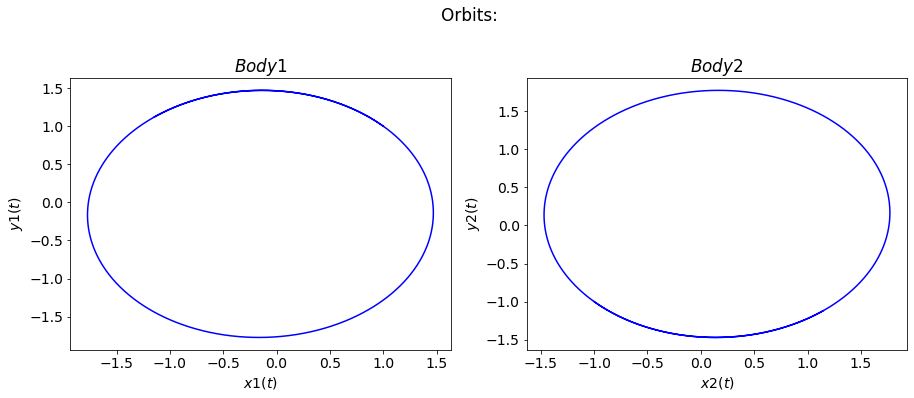

In [9]:
fig = plt.figure(figsize=(15,5))
overall_title = 'Orbits:  ' + \
                '\n'     # \n means a new line (adds some space here)
fig.suptitle(overall_title, va='baseline')
    
# first plot: phi plot 
ax_a = fig.add_subplot(1,2,1)                  

start, stop = start_stop_indices(t_pts, t_start, t_end)    
plot_y_vs_x(x1[start : stop], y1[start : stop], 
            axis_labels=body_1_labels, 
            color='blue',
            label=None, 
            title=r'$Body 1$', 
            ax=ax_a)    
                              
# second plot: phi_dot plot 
ax_b = fig.add_subplot(1,2,2)                  

start, stop = start_stop_indices(t_pts, t_start, t_end)    
plot_y_vs_x(x2[start : stop], y2[start : stop], 
            axis_labels=body_2_labels, 
            color='blue',
            label=None, 
            title=r'$Body2$', 
            ax=ax_b)

In [10]:
m = 1.
M = 1000.
G = 1.

o2 = CartesianOrbit(m=m, M=M, G=G)

In [11]:
# Initial conditions
x1_0, x1_dot_0 = 5., 0.
y1_0, y1_dot_0 = 0., 10.
x2_0, x2_dot_0 = 0., 0.
y2_0, y2_dot_0 = 0., 0.

x1, y1, x2, y2, x1_dot, y1_dot, x2_dot, y2_dot = o2.solve_ode(t_pts, x1_0, y1_0, x2_0, y2_0,
                                                             x1_dot_0, y1_dot_0, x2_dot_0, y2_dot_0)

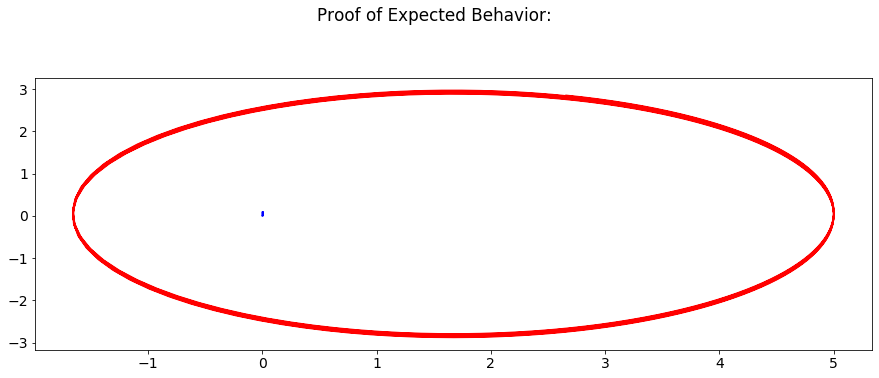

In [12]:
fig = plt.figure(figsize=(15,5))
overall_title = 'Proof of Expected Behavior:  ' + \
                '\n'     # \n means a new line (adds some space here)
fig.suptitle(overall_title, va='baseline')
    
# first plot: phi plot 
plt.plot(x1, y1, 'r')
plt.plot(x2, y2, 'b')
plt.show()